# Bank Stock Value Prediction
## **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500) # your numbers here
pd.set_option('display.max_columns', 500)

In [2]:
sns.set(rc={'figure.figsize': (18,6)})

In [3]:
car_df = pd.read_csv('Data/car_v3.csv')

### **What does the data look like?**
    We have balance sheet features expressed in dollars
    We have income statement features expressed id dollars
    We have performance-ratio features
    We have segment banks based on asset size:  small, medium, and large

In [ ]:
car_df.shape

### **Segment features into balance/income statement versus performance ratios**
    1.Create segment based on balance sheet and income statement features
    2.Create segment based on performance ratio features

In [4]:
#Create balance sheet and income statement dataframe
bal_inc_df = car_df.iloc[0:,0:]
#Drop performance ratios features but keep last row (bank size) and other rows.
bal_inc_df.drop(bal_inc_df.iloc[:,65:98], inplace=True, axis=1)
bal_inc_df.drop(columns=['Cert', 'address', 'City', 'State', 'Zip', 'Report Date', 'mutual','% Insured'], inplace=True)
bal_inc_df = bal_inc_df.iloc[0:,1:]

In [ ]:
bal_inc_df.head()

In [ ]:
bal_inc_df.shape

In [5]:
#Create performance ratios dataframe
perf_rat_df = car_df.iloc[0:,0:]
#Drop balance sheet features.
perf_rat_df.drop(perf_rat_df.iloc[:,12:64], inplace=True, axis=1)
#Drop income statement features.
perf_rat_df.drop(perf_rat_df.iloc[:,46:70], inplace=True, axis=1)
#Drop other rows
perf_rat_df.drop(columns=['Cert', 'address', 'City', 'State', 'Zip', 'Report Date', 'mutual', 'offdom', 'Number Employees'], inplace=True)
perf_rat_df = perf_rat_df.iloc[:,1:38]

In [ ]:
perf_rat_df.head()

In [ ]:
perf_rat_df.shape

### **Segment bal_inc_df based on small, medium and large banks.  Each segment will be analyzed separately.**

In [6]:
bal_inc_small_df = bal_inc_df.loc[car_df['Bank Size'] == 'Small']
bal_inc_medium_df = bal_inc_df.loc[car_df['Bank Size'] == 'Medium']
bal_inc_large_df = bal_inc_df.loc[car_df['Bank Size'] == 'Large']

In [ ]:
bal_inc_medium_df.shape

In [ ]:
bal_inc_small_df.shape

In [ ]:
bal_inc_large_df.shape

### **Segment bal_inc_df based on small, medium and large banks.  Each segment will be analyzed separately.**

In [7]:
perf_rat_small_df = perf_rat_df.loc[car_df['Bank Size'] == 'Small']
perf_rat_medium_df = perf_rat_df.loc[car_df['Bank Size'] == 'Medium']
perf_rat_large_df = perf_rat_df.loc[car_df['Bank Size'] == 'Large']

In [ ]:
perf_rat_medium_df.shape

In [ ]:
perf_rat_small_df.shape

In [ ]:
perf_rat_large_df.shape

### **Analyze Balance Sheet & Income Statement Feature Segment.**

In [10]:
perf_rat_medium_df.describe()

,Fed RSSD,Yield on Earning Assets,Cost of Funding Earnings Assets,Net Interest Margin,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Loan Lease Loss Prov to Assets,Net Op Inc to Assets,Return On Assets,Pretax ROA,Return on Equity,RE to Ave Equity,Net Chargeoffs to Loans,Credit Loss Prov to Chargeoffs,Efficiency Ratio,Assets per Emp,Cash Div to Net Inc,Earning Assets to Total Asst Ratio,Loss Allow to Loans,Loan Loss Allow to noncurr Loans,Noncurr Assets Other RE,Noncurrent Loans to Loans,Net Loans Lease to Tot Assets,Net Loans Lease to Deposits,Net Loans Lease to core deposits,Tot Dom Deposits to Tot Assets,Equity to Assets,Core Capital Ratio,Tier 1-based risk capital,Total risk based Capt ratio,Common Equity tier 1,Average Total Assets.1,Average earning assets,Average equity,Average Total Loans
count,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03
mean,9.825358e+05,4.374796,0.575063,3.799733,1.180668,3.159360,0.122791,1.222591,1.220883,1.426075,10.144929,5.543414,0.108056,47.607257,67.735890,6.236468,39.440274,92.972587,1.295630,1089.849551,0.856527,0.986335,66.271336,80.569061,326.101988,83.099371,11.751049,11.731835,25.292191,26.358196,25.264536,9.669133e+05,8.918345e+05,1.145872e+05,6.665567e+05
std,1.035319e+06,1.021336,0.306493,0.958571,10.035937,5.514374,0.411783,4.975244,4.968852,6.252945,13.035112,6.829558,0.580769,4198.377234,23.672157,24.078027,191.103918,3.808019,0.737136,5993.058672,1.375830,1.527478,16.135775,32.693101,13358.157183,7.989412,5.525288,5.489716,500.239606,500.222953,500.240249,3.334449e+06,3.060815e+06,4.192978e+05,2.275357e+06
min,3.700000e+01,0.004849,0.000000,-1.691405,-5.311467,0.000000,-4.584085,-13.005543,-13.005543,-13.000572,-71.745560,-89.020316,-4.284245,-117500.000000,-280.638144,0.095114,-3846.153846,2.308442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040228,1.858165,2.110290,2.545715,3.212663,2.545715,3.714233e+04,1.566670e+03,3.026330e+03,3.300000e-01
25%,3.199132e+05,3.905537,0.349942,3.353701,0.315592,2.291900,0.000000,0.745784,0.747277,0.879003,6.596481,2.992371,-0.005510,0.000000,58.212708,3.902945,0.000000,91.574836,0.950269,95.078563,0.179379,0.185584,57.739972,68.049290,72.156475,80.462836,9.407191,9.453846,12.406994,13.459011,12.375742,1.237674e+05,1.152201e+05,1.399125e+04,7.693525e+04
50%,6.433960e+05,4.316201,0.540268,3.759286,0.530685,2.762022,0.061533,1.075435,1.077428,1.260090,9.813373,5.774089,0.013986,47.607257,66.749986,4.788256,27.472527,93.310483,1.194493,206.621489,0.499730,0.553368,69.673724,82.990164,89.167159,84.701626,10.794890,10.678721,14.899680,16.010109,14.882586,2.427572e+05,2.262362e+05,2.676317e+04,1.623050e+05
75%,9.491918e+05,4.755131,0.758566,4.159463,0.838680,3.250694,0.142949,1.421429,1.424451,1.646214,13.147539,8.692979,0.098518,200.000000,75.301766,6.190051,58.635080,94.993853,1.487665,655.106058,1.058548,1.215154,78.018209,94.315599,105.225374,87.924165,12.603703,12.411036,19.036933,20.117917,19.035501,5.460102e+05,5.113115e+05,6.175150e+04,3.913625e+05
max,5.227101e+06,25.299932,3.470988,23.949882,518.707022,247.826298,11.230681,331.488091,331.488091,419.605254,779.934535,50.877685,18.545028,80000.000000,1095.454545,1572.026600,10000.000000,99.788768,14.986740,140700.000000,32.877823,31.757129,98.857443,1818.389524,930026.000000,97.154347,97.902759,100.897155,35347.402600,35347.402600,35347.402600,4.913018e+07,4.793282e+07,9.149333e+06,3.633066e+07


In [ ]:
bal_inc_medium_df.describe()

### **Analyze Balance Sheet & Income Statement Feature Segment.**

    
<img src="Data/features.png"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

Create a dataframe with only the selected features.

In [22]:
features_perfrat_df = perf_rat_medium_df[['Tot Dom Deposits to Tot Assets', 'Pretax ROA','Net Op Inc to Assets', 'Return On Assets',
                                        'NonInterest Inc to Ave Asset', 'NonInterest Exp to Ave Asset', 'Net Interest Margin', 
                                       'RE to Ave Equity', 'Efficiency Ratio', 'Net Loans Lease to Tot Assets']]


Issues identified below:  outliers

In [23]:
features_perfrat_df.describe()

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000
mean,83.099371,1.426075,1.222591,1.220883,1.180668,3.159360,3.799733,5.543414,67.735890,66.271336
std,7.989412,6.252945,4.975244,4.968852,10.035937,5.514374,0.958571,6.829558,23.672157,16.135775
min,0.040228,-13.000572,-13.005543,-13.005543,-5.311467,0.000000,-1.691405,-89.020316,-280.638144,0.000000
25%,80.462836,0.879003,0.745784,0.747277,0.315592,2.291900,3.353701,2.992371,58.212708,57.739972
50%,84.701626,1.260090,1.075435,1.077428,0.530685,2.762022,3.759286,5.774089,66.749986,69.673724
75%,87.924165,1.646214,1.421429,1.424451,0.838680,3.250694,4.159463,8.692979,75.301766,78.018209
max,97.154347,419.605254,331.488091,331.488091,518.707022,247.826298,23.949882,50.877685,1095.454545,98.857443


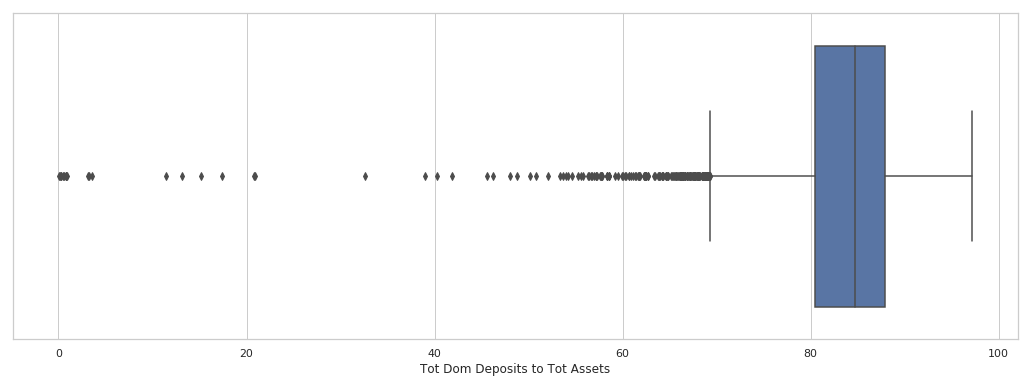

In [29]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df["Tot Dom Deposits to Tot Assets"])

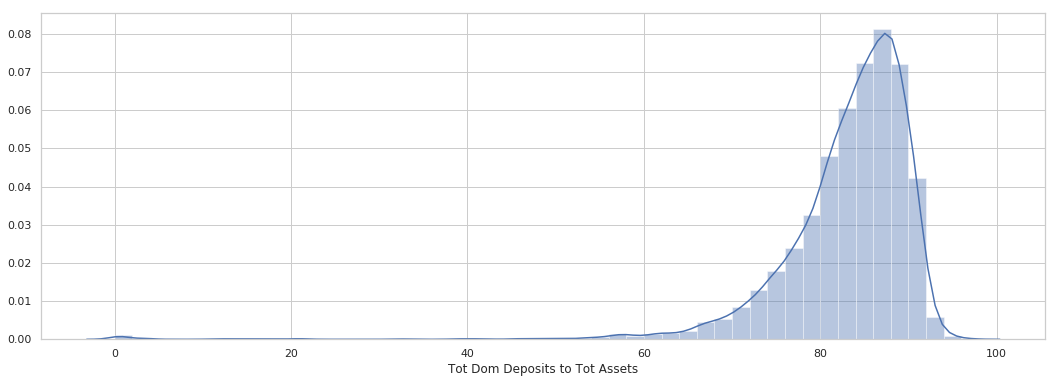

In [32]:
sns.distplot(features_perfrat_df['Tot Dom Deposits to Tot Assets'],hist_kws={"range": [0,100]})

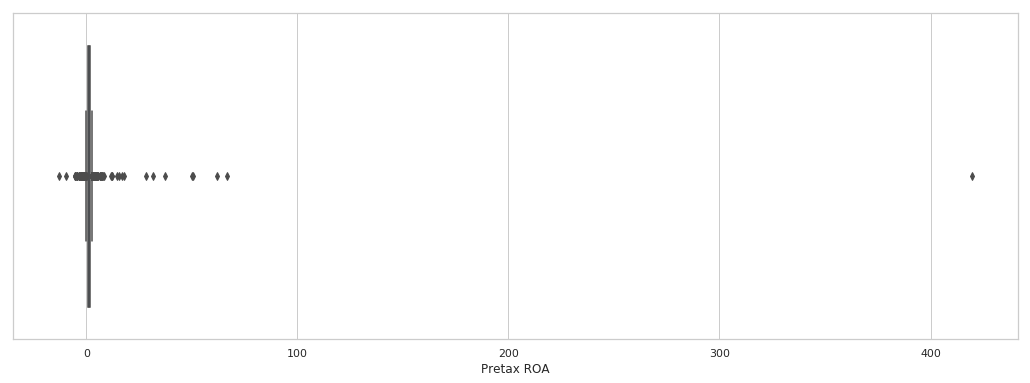

In [33]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['Pretax ROA'])

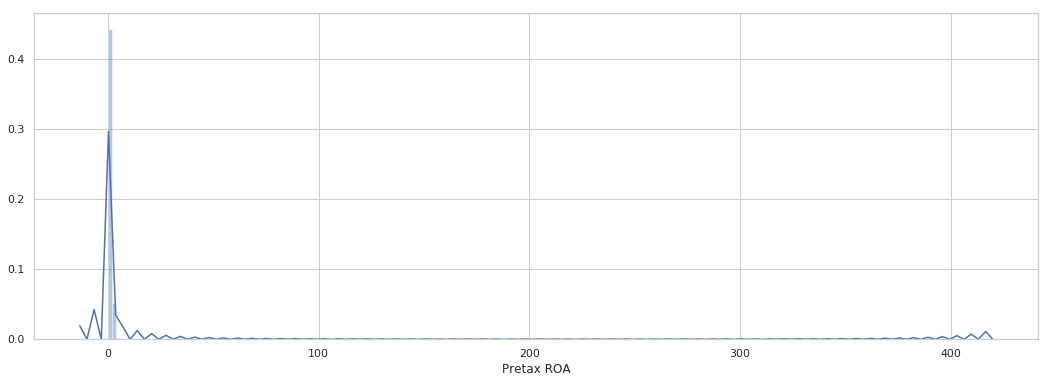

In [34]:
sns.distplot(features_perfrat_df['Pretax ROA'],hist_kws={"range": [0,100]})

In [60]:
features_perfrat_df.loc[features_perfrat_df['Pretax ROA'] > 100]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
1682,13.084895,419.605254,331.488091,331.488091,518.707022,100.37238,1.50377,-2.438091,19.303653,2.107977


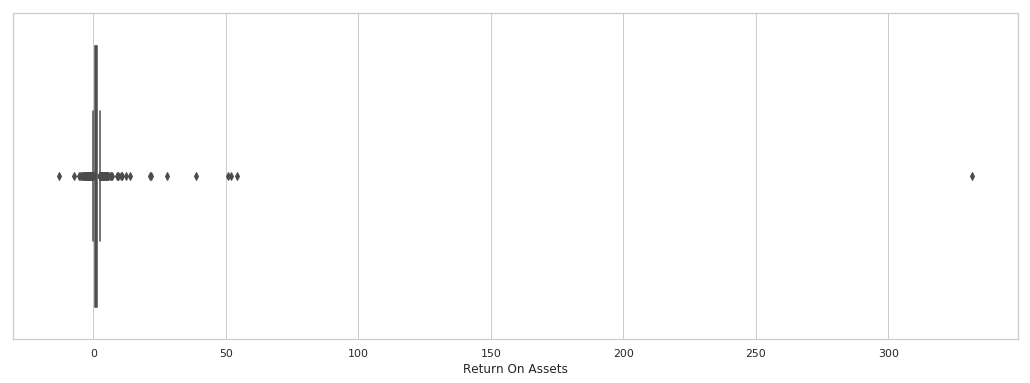

In [57]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['Return On Assets'])

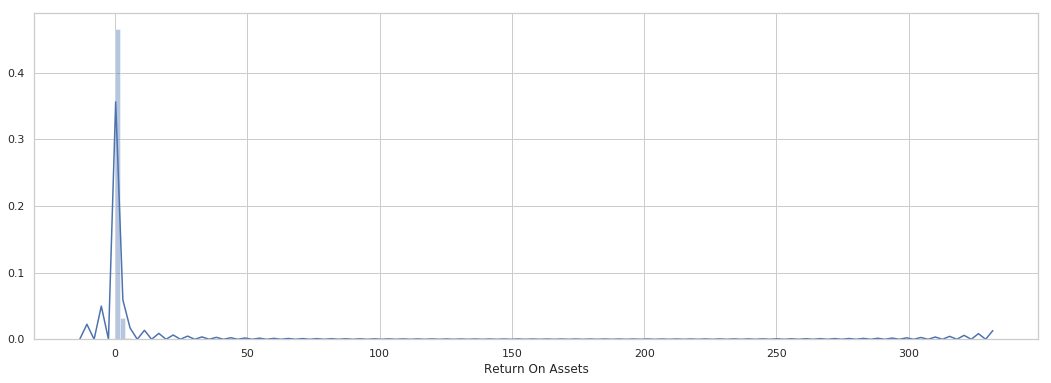

In [59]:
sns.distplot(features_perfrat_df['Return On Assets'],hist_kws={"range": [0,100]})

In [61]:
features_perfrat_df.loc[features_perfrat_df['Return On Assets'] > 100]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
1682,13.084895,419.605254,331.488091,331.488091,518.707022,100.37238,1.50377,-2.438091,19.303653,2.107977


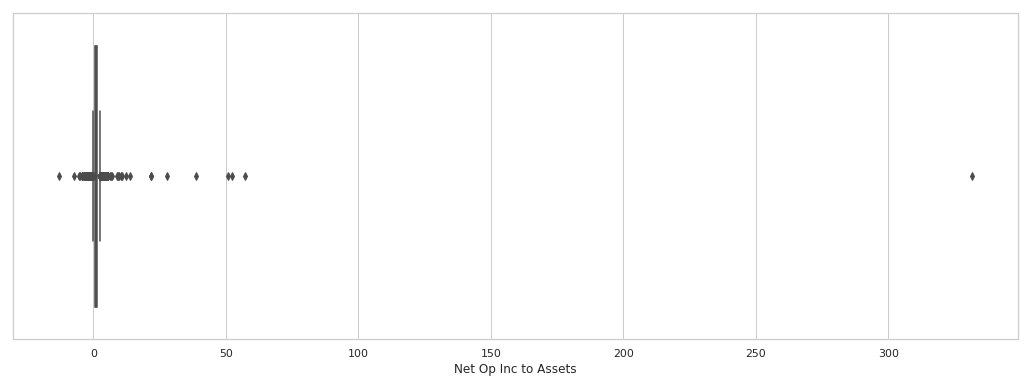

In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['Net Op Inc to Assets'])

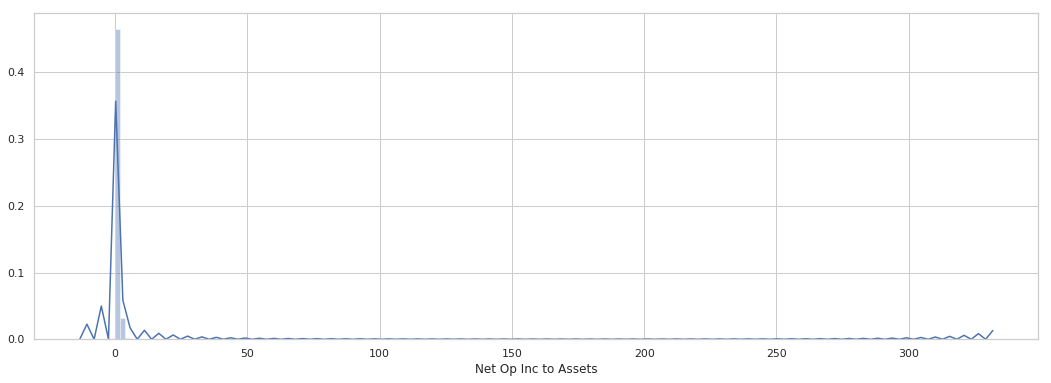

In [38]:
sns.distplot(features_perfrat_df['Net Op Inc to Assets'],hist_kws={"range": [0,100]})

In [62]:
features_perfrat_df.loc[features_perfrat_df['Net Op Inc to Assets'] > 100]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
1682,13.084895,419.605254,331.488091,331.488091,518.707022,100.37238,1.50377,-2.438091,19.303653,2.107977


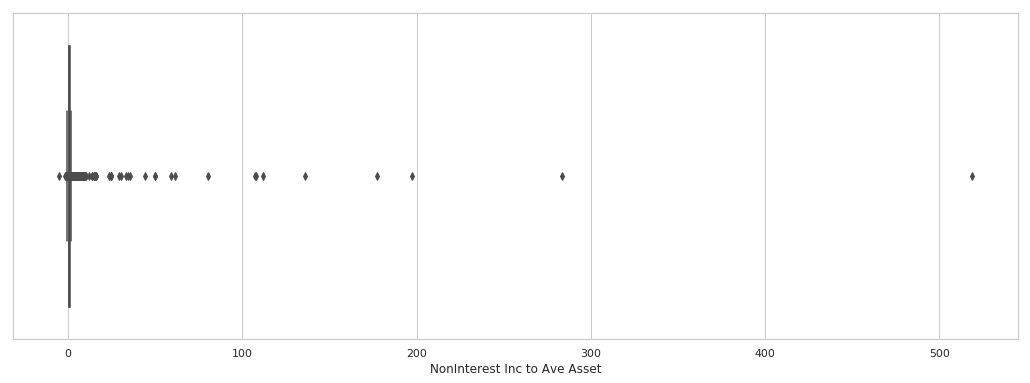

In [41]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['NonInterest Inc to Ave Asset'])

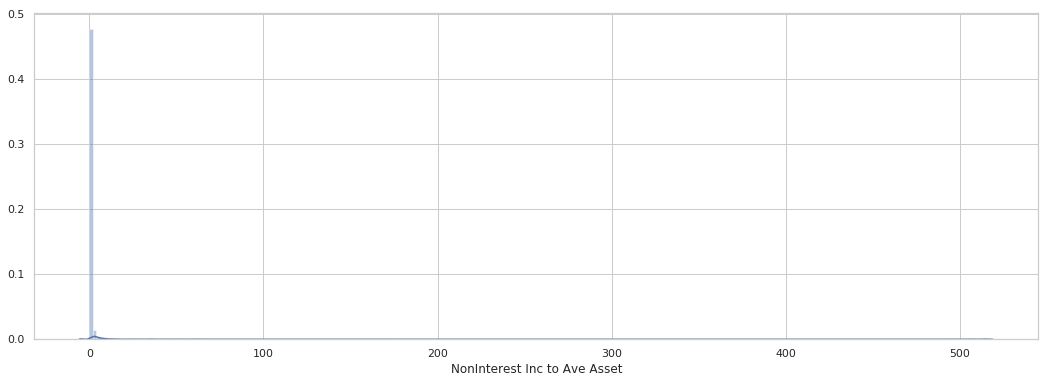

In [42]:
sns.distplot(features_perfrat_df['NonInterest Inc to Ave Asset'],hist_kws={"range": [0,100]})

In [63]:
features_perfrat_df.loc[features_perfrat_df['NonInterest Inc to Ave Asset'] > 100]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
715,0.285932,31.776833,21.762080,21.521989,136.090655,106.979769,4.588125,37.208555,76.930370,0.000000
1099,0.757665,50.026777,38.715331,38.715331,107.934241,57.969133,2.425527,39.922571,52.880714,0.000000
1317,11.487960,50.759620,50.759620,50.759620,197.425211,147.566080,5.798675,5.629423,73.346302,14.871116
1682,13.084895,419.605254,331.488091,331.488091,518.707022,100.372380,1.503770,-2.438091,19.303653,2.107977
1699,0.519988,62.138067,57.259726,54.306900,107.363360,43.857816,2.793765,-61.848272,40.093100,0.000000
3364,17.377361,37.177329,27.943542,27.942960,283.398961,247.826298,1.673912,44.185434,86.955265,0.000000
3977,0.307768,66.840139,52.225664,51.949471,176.991698,111.647189,2.574329,22.511301,62.429602,0.000000
5122,3.241281,-0.109312,-0.080377,-0.080377,112.009902,111.440835,-1.691405,-0.133255,100.098186,0.000000


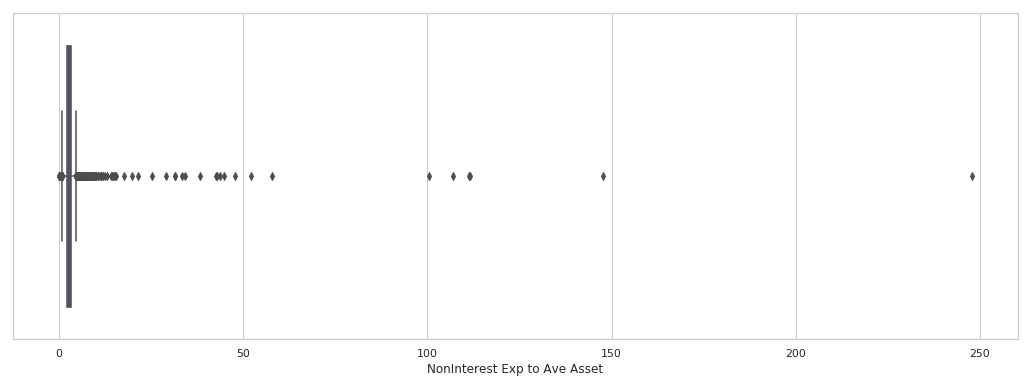

In [43]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['NonInterest Exp to Ave Asset'])

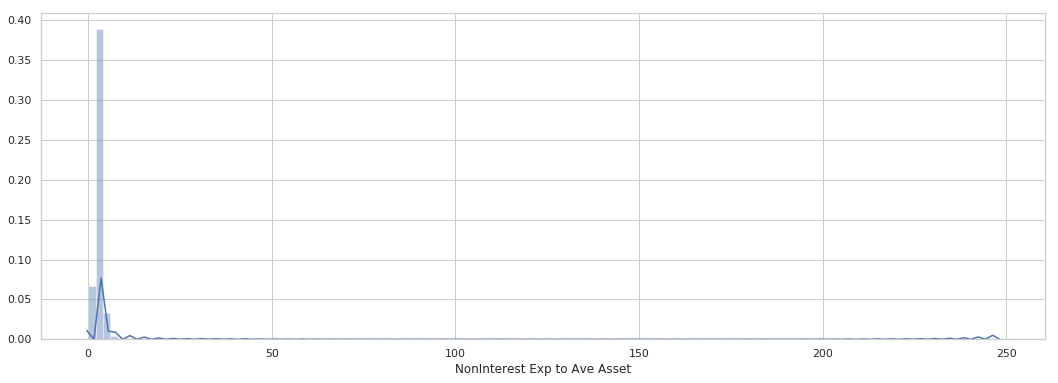

In [44]:
sns.distplot(features_perfrat_df['NonInterest Exp to Ave Asset'],hist_kws={"range": [0,100]})

In [64]:
features_perfrat_df.loc[features_perfrat_df['NonInterest Exp to Ave Asset'] > 100]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
715,0.285932,31.776833,21.762080,21.521989,136.090655,106.979769,4.588125,37.208555,76.930370,0.000000
1317,11.487960,50.759620,50.759620,50.759620,197.425211,147.566080,5.798675,5.629423,73.346302,14.871116
1682,13.084895,419.605254,331.488091,331.488091,518.707022,100.372380,1.503770,-2.438091,19.303653,2.107977
3364,17.377361,37.177329,27.943542,27.942960,283.398961,247.826298,1.673912,44.185434,86.955265,0.000000
3977,0.307768,66.840139,52.225664,51.949471,176.991698,111.647189,2.574329,22.511301,62.429602,0.000000
5122,3.241281,-0.109312,-0.080377,-0.080377,112.009902,111.440835,-1.691405,-0.133255,100.098186,0.000000


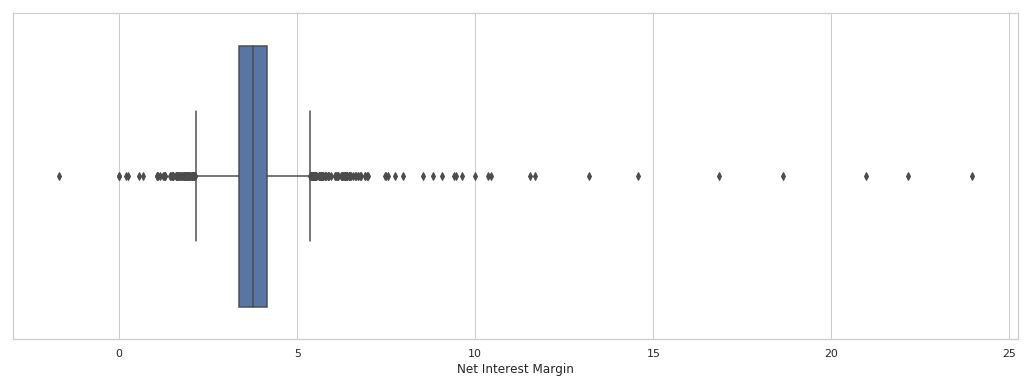

In [45]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['Net Interest Margin'])

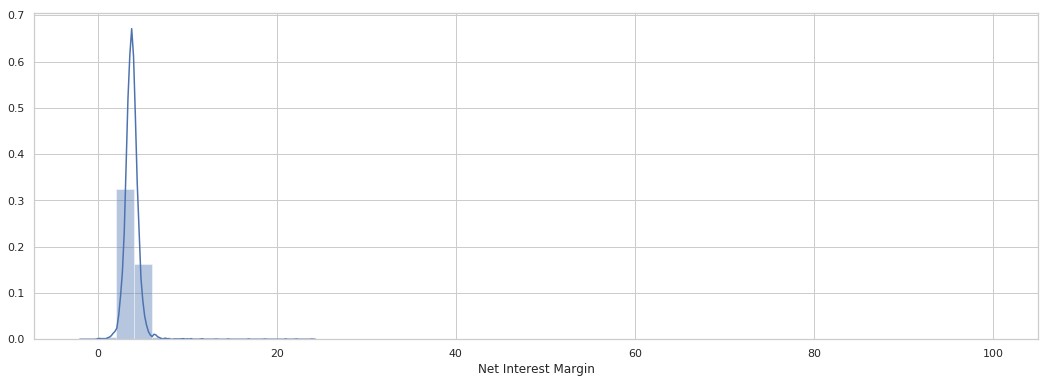

In [46]:
sns.distplot(features_perfrat_df['Net Interest Margin'],hist_kws={"range": [0,100]})

In [66]:
features_perfrat_df.loc[features_perfrat_df['Net Interest Margin'] > 15]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
15,70.503426,1.927874,1.349987,1.349987,2.696410,14.338192,18.641510,5.969653,76.099737,72.773878
1096,38.955366,5.468213,3.848346,3.848457,-0.163954,9.464457,22.160742,-4.666948,44.922433,79.649439
1097,62.466471,3.239871,2.318112,2.313646,1.541146,8.025713,16.836268,17.367106,44.380103,78.835627
3113,78.313490,8.453921,6.257195,6.257195,4.297758,6.254406,23.949882,24.806305,24.111971,81.859780
5483,69.216731,12.379465,9.555416,9.483340,14.888388,19.847058,20.979359,10.825796,59.306141,87.670456


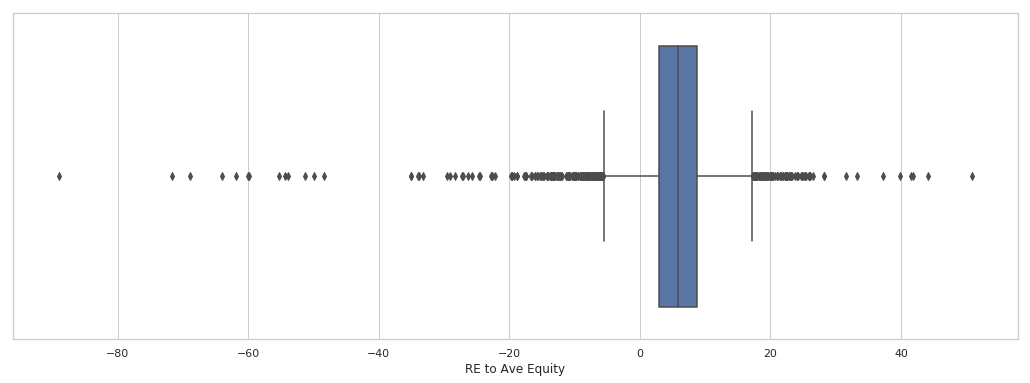

In [47]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['RE to Ave Equity'])

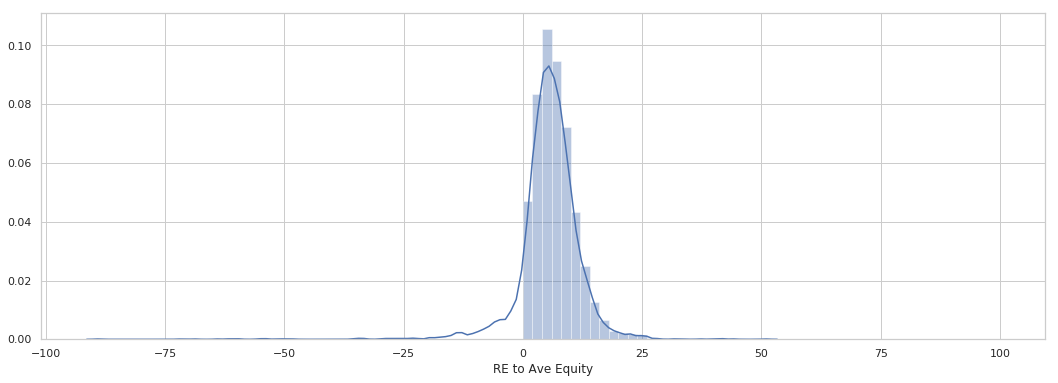

In [48]:
sns.distplot(features_perfrat_df['RE to Ave Equity'],hist_kws={"range": [0,100]})

In [79]:
features_perfrat_df.loc[(features_perfrat_df['RE to Ave Equity'] > 40) | (features_perfrat_df['RE to Ave Equity'] < -40)]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
189,84.897883,6.646310,5.076245,5.076245,1.428043,3.786123,9.991293,-60.113848,35.645121,83.617596
565,83.938470,-1.779420,-1.772760,-1.779420,0.652246,4.616502,2.954015,-68.920099,162.338993,60.756380
1042,95.199620,-2.238541,-2.238541,-2.238541,-0.188402,5.858698,4.374857,-71.745560,160.604365,63.125200
1629,84.930805,3.158303,1.007607,1.822959,0.146457,2.014215,4.222709,-55.277070,48.647524,81.129041
1699,0.519988,62.138067,57.259726,54.306900,107.363360,43.857816,2.793765,-61.848272,40.093100,0.000000
1752,89.861131,-5.467718,-5.467718,-5.467718,-5.311467,4.031257,4.557074,-48.395722,-280.638144,64.636660
1863,81.934078,1.939676,1.364215,1.573008,2.428054,4.164538,4.039431,-89.020316,70.400139,57.490227
2713,76.276143,14.765942,10.617618,10.617618,29.208257,11.846751,6.989403,50.877685,33.229415,72.466288
2787,83.745848,-5.006674,-5.010785,-5.010785,0.598597,2.634486,2.879212,-50.002728,77.766990,67.442378
3255,66.609995,-4.319076,0.377007,-4.424655,4.042818,3.564915,0.004849,-53.839400,88.076918,63.840479


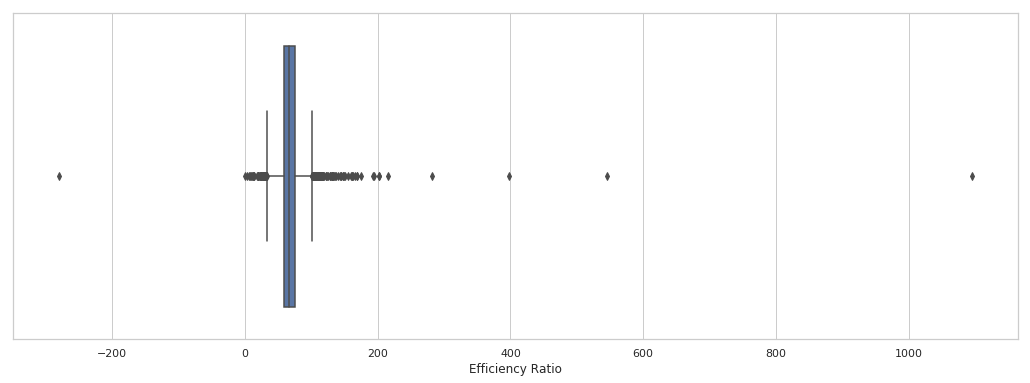

In [49]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['Efficiency Ratio'])

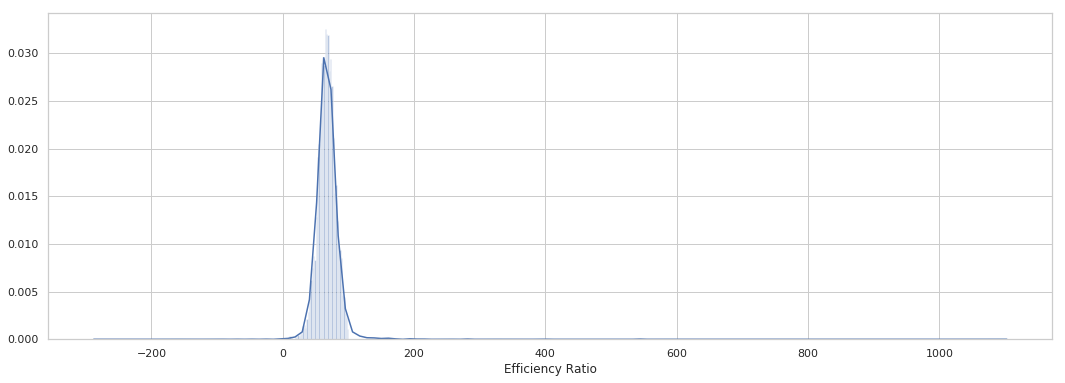

In [50]:
sns.distplot(features_perfrat_df['Efficiency Ratio'],hist_kws={"range": [0,100]})

In [81]:
features_perfrat_df.loc[(features_perfrat_df['Efficiency Ratio'] > 200) | (features_perfrat_df['Efficiency Ratio'] < -200)]

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
610,81.047431,-3.323233,-3.324730,-3.324730,0.043431,5.469331,2.533686,-18.809837,214.823529,63.755222
696,57.672831,-4.195750,-4.199572,-4.199572,0.057319,8.303612,4.214935,-13.843053,202.139535,55.054477
1111,15.145060,-3.527921,-3.527921,-3.527921,0.517569,4.207450,0.262774,-4.259842,545.662100,3.774382
1454,53.352039,-13.000572,-13.005543,-13.005543,0.004972,13.179547,1.294238,-22.708333,1095.454545,25.982528
1752,89.861131,-5.467718,-5.467718,-5.467718,-5.311467,4.031257,4.557074,-48.395722,-280.638144,64.636660
3024,56.628745,-9.379131,-7.416057,-7.416057,0.038006,10.704371,2.992135,-13.664320,397.467573,58.709773
3048,86.767482,-1.877853,-1.877853,-1.877853,0.074724,3.716719,1.781029,-29.585420,202.120141,46.257905
4490,81.116766,2.214063,2.214063,2.214063,-0.641059,3.303494,1.916319,16.200457,282.120253,28.605345


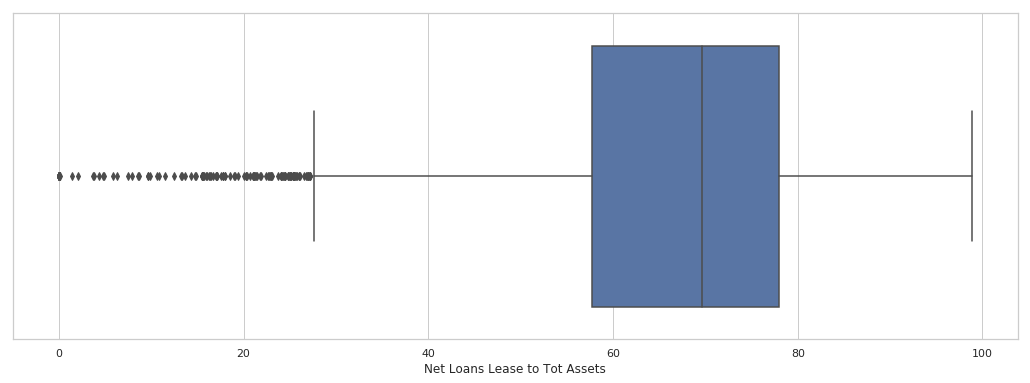

In [51]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=features_perfrat_df['Net Loans Lease to Tot Assets'])

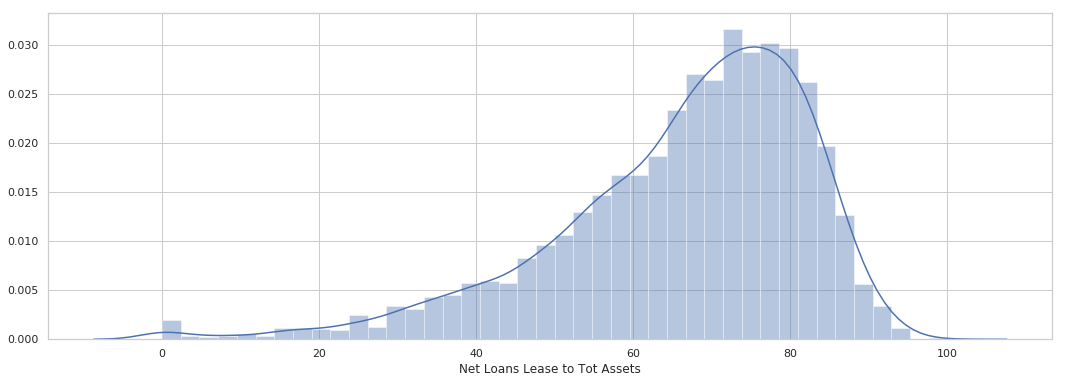

In [52]:
sns.distplot(features_perfrat_df['Net Loans Lease to Tot Assets'],hist_kws={"range": [0,100]})

Issues identified below:  higly correlated features (> 0.70)

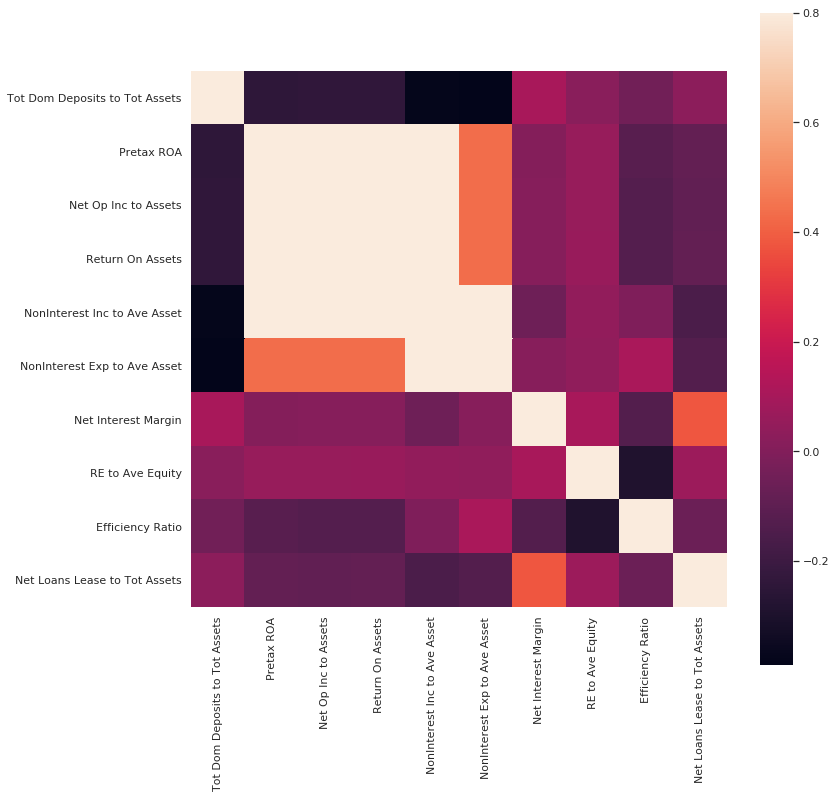

In [24]:
# Correlation visualization
corrmat = features_perfrat_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [26]:
features_perfrat_df.corr()

,Tot Dom Deposits to Tot Assets,Pretax ROA,Net Op Inc to Assets,Return On Assets,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Net Interest Margin,RE to Ave Equity,Efficiency Ratio,Net Loans Lease to Tot Assets
Tot Dom Deposits to Tot Assets,1.000000,-0.241687,-0.238503,-0.237229,-0.378283,-0.390345,0.103278,0.021702,-0.043420,0.030163
Pretax ROA,-0.241687,1.000000,0.998149,0.998460,0.862737,0.433911,0.009290,0.057550,-0.119589,-0.085243
Net Op Inc to Assets,-0.238503,0.998149,1.000000,0.999747,0.862855,0.436178,0.011522,0.058135,-0.128952,-0.088522
Return On Assets,-0.237229,0.998460,0.999747,1.000000,0.862283,0.435359,0.012070,0.061873,-0.129139,-0.087299
NonInterest Inc to Ave Asset,-0.378283,0.862737,0.862855,0.862283,1.000000,0.824714,-0.051144,0.044278,-0.004489,-0.156971
NonInterest Exp to Ave Asset,-0.390345,0.433911,0.436178,0.435359,0.824714,1.000000,0.016115,0.041055,0.108326,-0.132192
Net Interest Margin,0.103278,0.009290,0.011522,0.012070,-0.051144,0.016115,1.000000,0.103207,-0.131407,0.378533
RE to Ave Equity,0.021702,0.057550,0.058135,0.061873,0.044278,0.041055,0.103207,1.000000,-0.289210,0.074092
Efficiency Ratio,-0.043420,-0.119589,-0.128952,-0.129139,-0.004489,0.108326,-0.131407,-0.289210,1.000000,-0.060346
Net Loans Lease to Tot Assets,0.030163,-0.085243,-0.088522,-0.087299,-0.156971,-0.132192,0.378533,0.074092,-0.060346,1.000000


In [ ]:


#Pull specific rows and turn visualize as columns
car_df.ix[0]

In [ ]:
#What are the available columns?
car_df.columns

In [ ]:
#descriptive statistics summary of a given column dataset
car_df['Net Income'].describe()

In [ ]:
car_df['Cash Dividends'].describe()

In [ ]:
car_df['Total Assets'].describe()

Definition of Kurtosis https://en.wikipedia.org/wiki/Kurtosis

In [ ]:
print("Skewness: %f" % car_df['Cash Dividends'].skew())
print("Kurtosis: %f" % car_df['Cash Dividends'].kurt())

In [ ]:
print("Skewness: %f" % car_df['Total Assets'].skew())
print("Kurtosis: %f" % car_df['Total Assets'].kurt())

In [ ]:
scatter1 = pd.concat([car_df['Total Assets'], car_df['Cash Dividends']], axis=1)
scatter1.plot.scatter(x='Total Assets', y='Cash Dividends')

In [ ]:
scatter1 = pd.concat([car_df['Total Assets'], car_df['Bank Equity']], axis=1)
scatter1.plot.scatter(x='Total Assets', y='Bank Equity')

In [ ]:
car_df.plot.scatter(x='Total Assets', y='Net Income');

In [ ]:
# Show correlations
car_df.corr()

In [ ]:
# Correlation visualization
corrmat = car_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

Boxplot Total Assets

boxplot documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=car_df["Total Assets"])

Pairplot


In [ ]:
#sns.pairplot(car_df)

In [ ]:
#sns.heatmap(car_df.corr(),cmap='coolwarm',annot=True)

In [ ]:
#sns.clustermap(car_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#standardizing data: Total Assets

total_assets_standardized = StandardScaler().fit_transform(car_df['Total Assets'][:,np.newaxis]);
low_range = total_assets_standardized[total_assets_standardized[:,0].argsort()][:20]
high_range= total_assets_standardized[total_assets_standardized[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
low_range

In [ ]:
print('\nouter range (high) of the distribution:')
high_range

There are a few high variances as seen on above columns

In [ ]:
perf_rat_medium_df.head()

In [ ]:
my_list_ratios = list(perf_rat_medium_df.columns.values)

In [ ]:
my_list_ratios